In [1]:
#Step 1: Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install streamlit
!pip install kaggle
import warnings
warnings.filterwarnings('ignore')
# Set plotting style
plt.style.use('default')
sns.set_palette("viridis")

In [2]:
#STEP 2 : Importing dataset using kaggle API
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'  # or your working directory


In [3]:
import json
import os

kaggle_token = {"username":"aditibansal0603","key":"f760c3b82af34f1d5f532d74d0112149"}
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_token, f)


In [4]:
!kaggle datasets download -d amanalisiddiqui/fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/amanalisiddiqui/fraud-detection-dataset
License(s): MIT
fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
import os

# Path where Kaggle saved the zip
zip_path = r"C:\Users\kusha\fraud-detection-dataset.zip"

# Extract to a folder
extract_path = r"C:\Users\kusha\fraud_detection_data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))


Extracted files: ['AIML Dataset.csv']


In [6]:
import pandas as pd
import os

# Build full file path
file_path = os.path.join(extract_path, "AIML Dataset.csv")

# Load dataset
df = pd.read_csv(file_path)

# Show first few rows
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [8]:
#STEP 3 : EXPLORATORY DATA ANALYSIS

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [11]:
#checking for nulls 
df.isnull().sum().sum()

0

In [12]:
#percentage of fraudelent transactions 
percent_fraud=round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)
print(percent_fraud)

0.13


plot to show different types of transactions

In [14]:

df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Text(0, 0.5, 'count')

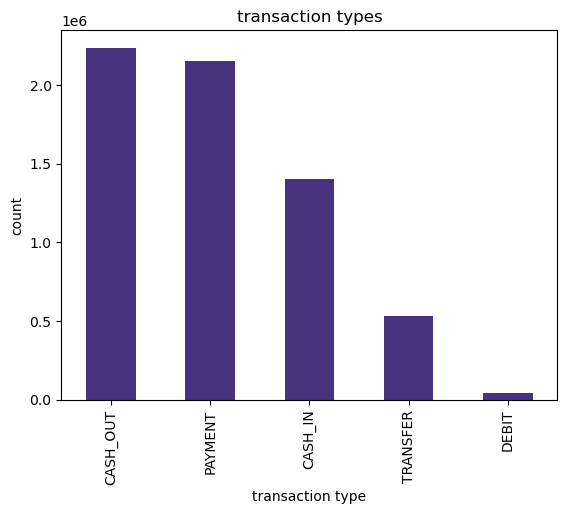

In [15]:
df["type"].value_counts().plot(kind="bar",title="transaction types")
plt.xlabel("transaction type")
plt.ylabel("count")

plot to show transactions by different transaction types

In [17]:
trans_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
print(trans_by_type)


type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


<Axes: title={'center': 'percentage of fraud in transactions by type'}, ylabel='isFraud'>

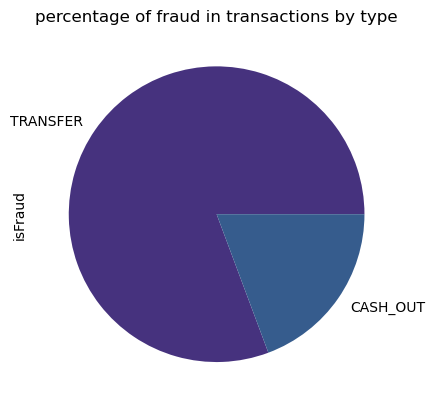

In [18]:
trans_by_type.plot(kind="pie",title="percentage of fraud in transactions by type")

In [19]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

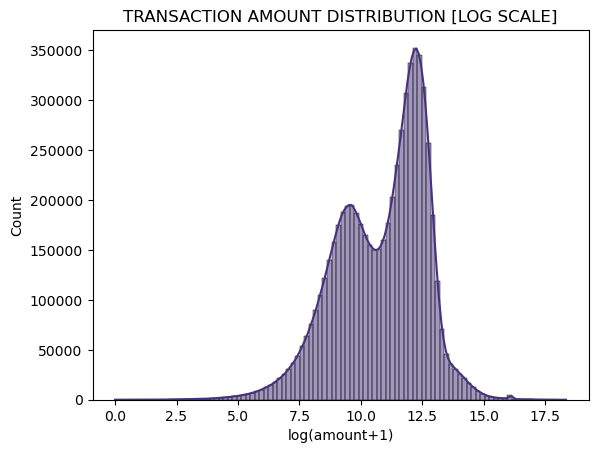

In [20]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True)
plt.title("TRANSACTION AMOUNT DISTRIBUTION [LOG SCALE]")
plt.xlabel("log(amount+1)")
plt.show()

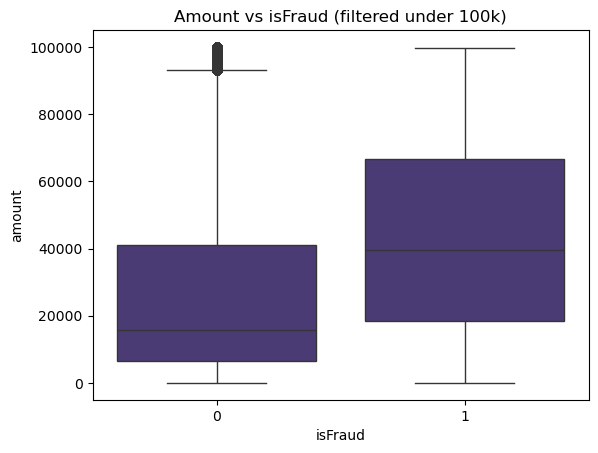

In [21]:
sns.boxplot(data=df[df["amount"]<100000 ],x="isFraud",y="amount")
plt.title("Amount vs isFraud (filtered under 100k)")
plt.show()

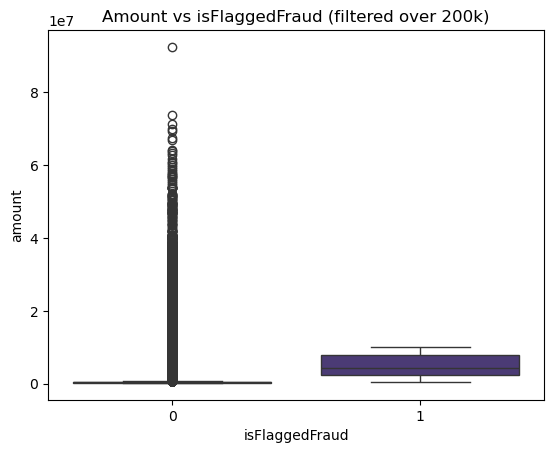

In [22]:
sns.boxplot(data=df[df["amount"]>200000 ],x="isFlaggedFraud",y="amount")
plt.title("Amount vs isFlaggedFraud (filtered over 200k)")
plt.show()

In [23]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["DestBalanceOrig"]=df["oldbalanceDest"]-df["newbalanceDest"]

In [24]:
(df[df["nameOrig"]=="C1902386530"])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,DestBalanceOrig
1165338,132,CASH_OUT,487055.28,C1902386530,0.0,0.00,C807210147,2497616.59,2984671.87,0,0,0.00,-487055.28
2300990,188,TRANSFER,29700.56,C1902386530,43077.0,13376.44,C1419531968,149417.09,179117.65,0,0,29700.56,-29700.56
5761952,400,CASH_OUT,246956.95,C1902386530,0.0,0.00,C1278669763,1680085.52,1927042.47,0,0,0.00,-246956.95


In [25]:
top_senders=df["nameOrig"].value_counts().head(10)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [26]:
top_recievers=df["nameDest"].value_counts().head(10)
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [27]:
(df[df["nameDest"]=="C1023714065" ])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,DestBalanceOrig
161,1,CASH_OUT,289645.52,C1446001495,0.00,0.00,C1023714065,871442.79,1412484.09,0,0,0.00,-541041.30
184,1,CASH_OUT,151829.91,C873309260,0.00,0.00,C1023714065,1161088.31,1412484.09,0,0,0.00,-251395.78
451,1,CASH_IN,74933.22,C379124840,1080930.07,1155863.30,C1023714065,1312918.22,1412484.09,0,0,-74933.23,-99565.87
480,1,CASH_IN,273305.73,C192456457,5912480.60,6185786.33,C1023714065,1237985.00,1412484.09,0,0,-273305.73,-174499.09
637,1,CASH_IN,198847.32,C1088491512,6157562.25,6356409.58,C1023714065,964679.26,1412484.09,0,0,-198847.33,-447804.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416482,378,CASH_IN,97261.19,C290300334,60.00,97321.19,C1023714065,20222310.22,20125049.03,0,0,-97261.19,97261.19
5549360,382,TRANSFER,4082094.44,C1831331937,119316.51,0.00,C1023714065,20125049.03,24207143.47,0,0,119316.51,-4082094.44
5630628,395,CASH_IN,76987.52,C2106303292,202478.00,279465.52,C1023714065,24207143.47,24130155.95,0,0,-76987.52,76987.52
5806705,401,TRANSFER,3564352.43,C1971571283,0.00,0.00,C1023714065,24130155.95,27854824.46,0,0,0.00,-3724668.51


In [28]:
fraud_users=df[df["isFraud"]==1] ["nameOrig"].value_counts().head(5)

In [29]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
Name: count, dtype: int64

In [30]:
fraud_types=df[df["type"].isin([ "TRANSFER","CASH_OUT"])]
fraud_types

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,DestBalanceOrig
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,-46430.44
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,-2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,-339682.13
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,-6311409.27
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [31]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

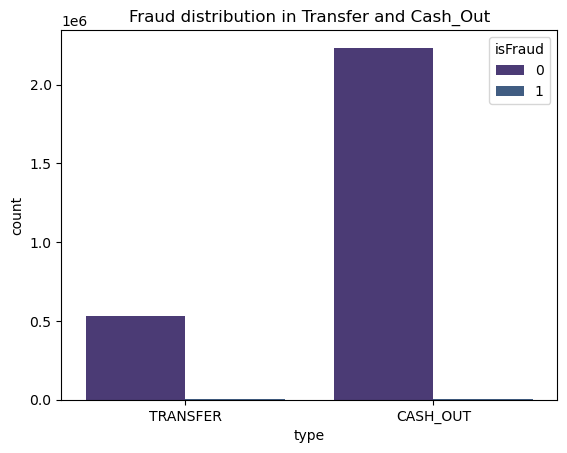

In [32]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud distribution in Transfer and Cash_Out")
plt.show()

In [33]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","newbalanceDest","oldbalanceDest","isFraud"]].corr()

In [34]:
corr

,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,oldbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.459304,0.294137,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.042029,0.066243,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.041837,0.067812,-0.008148
newbalanceDest,0.459304,0.042029,0.041837,1.000000,0.976569,0.000535
oldbalanceDest,0.294137,0.066243,0.067812,0.976569,1.000000,-0.005885
isFraud,0.076688,0.010154,-0.008148,0.000535,-0.005885,1.000000


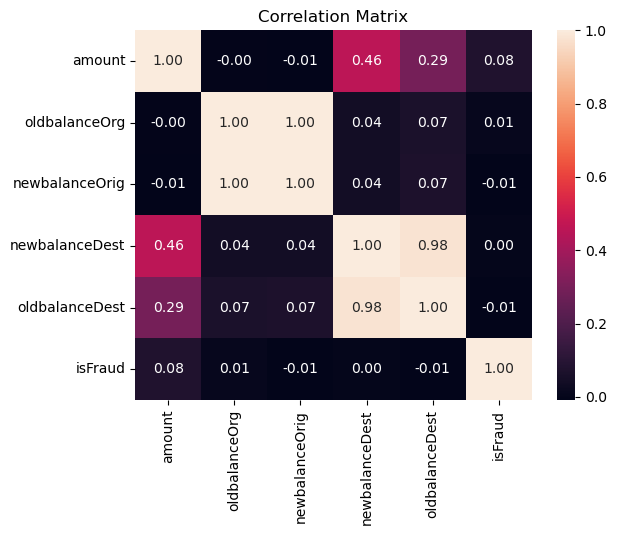

In [35]:
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [36]:
zero_balance_after_transfer=df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0) &
    (df["type"].isin(["Transfer","CASH_OUT"]))]

In [37]:
len(zero_balance_after_transfer)

959412

In [38]:
print(zero_balance_after_transfer.tail())

         step      type      amount     nameOrig  oldbalanceOrg  \
6362611   742  CASH_OUT    63416.99   C994950684       63416.99   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362611             0.0  C1662241365       276433.18       339850.17        1   
6362613             0.0  C1240760502       503464.50      1762283.33        1   
6362615             0.0   C776919290            0.00       339682.13        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  balanceDiffOrig  DestBalanceOrig  
6362611               0         63416.99        -6

FEATURE ENGINEERING AND TRAINING THE MODEL

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


In [41]:
df_model=df.drop(["nameDest","nameOrig","isFlaggedFraud"],axis=1)

In [42]:
categorical=["type"]
numerical=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [43]:
y=df_model["isFraud"]
x=df_model.drop("isFraud",axis=1)

In [44]:
#train test split
X_train , X_test ,Y_train , Y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [45]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numerical),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder="drop"
)

In [46]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [47]:
pipeline.fit(X_train, Y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [48]:
y_pred=pipeline.predict(X_test)

In [49]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.93      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [50]:
confusion_matrix(Y_test,y_pred)

array([[1803219,  103103],
       [    161,    2303]], dtype=int64)

In [51]:
pipeline.score(X_test,Y_test)*100

94.59006929011424

In [52]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']

In [ ]:
!streamlit run fraud_detection.py --server.headless true --server.port 8501 & npx localtunnel --port 8501
